# Two-Locus Simulations w. Serial Samples under Constant Population Size

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sys
import os
sys.path.append('../src/')
from coal_cov import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.autolayout'] = True

# Deboxing a particular axis
def debox(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

from tqdm import tqdm

# Making the relevant figure directories that we want
main_figdir = '../plots/two_locus_stats/'
supp_figdir = '../plots/supp_figs/two_locus_stats/'
os.makedirs(main_figdir, exist_ok=True)
os.makedirs(supp_figdir, exist_ok=True)

# Two-Loci, Two Haplotypes

CPU times: user 2.02 s, sys: 95.6 ms, total: 2.12 s
Wall time: 2.2 s


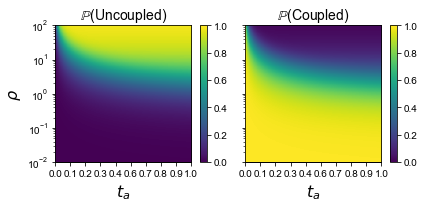

In [3]:
%%time
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define Probability of different states as a function of rho and time
rhos=10**np.linspace(-2, 2., num=100)
t = np.linspace(0.0, 1., num=100)
nrho = rhos.shape[0]
nt = t.shape[0]

prob1_mat = np.zeros(shape=(nrho, nt))
prob2_mat = np.zeros(shape=(nrho, nt))
for i in range(nrho):
    r = rhos[i]
    # Calculation of 
    cur_prob1 = r*(1.  - np.exp(-t*(r/2 + 1)))/(r + 2)
    cur_prob2 = 1. - (r*(1.  - np.exp(-t*(r/2 + 1)))/(r + 2))
    prob1_mat[i] = cur_prob1
    prob2_mat[i] = cur_prob2

    
# Plotting Values
f, ax = plt.subplots(1,2,figsize=(6,3), sharey=True)
ax[0].set(yscale="log")
ax02 = ax[0].twinx().twiny()
im1 = ax02.imshow(np.flip(prob1_mat, axis=0), vmin=0, vmax=1.0)

ax[0].set_ylim(np.min(rhos), np.max(rhos))
ax02.set_yticks([])
ax02.set_xticks([])
f.colorbar(im1, ax=ax02)

ax12 = ax[1].twinx().twiny()
ax[1].set(yscale="log")
im2 = ax12.imshow(np.flip(prob2_mat, axis=0), vmin=0, vmax=1.0)

ax[1].set_ylim(np.min(rhos), np.max(rhos))
ax12.set_yticks([])
ax12.set_xticks([])
f.colorbar(im2, ax=ax12)


# Tick Labels
idx = np.linspace(0, nt-1, 10, dtype=np.int32)
ax[0].set_xticks(idx);
ax[1].set_xticks(idx);
ax[0].set_xticklabels(np.round(t[idx],decimals=1), {'fontsize': 10})
ax[1].set_xticklabels(np.round(t[idx],decimals=1),{'fontsize': 10})

ax[0].set_ylabel(r'$\rho$', fontsize=16)
ax[0].set_xlabel(r'$t_a$', fontsize=16)
ax[1].set_xlabel(r'$t_a$', fontsize=16)
ax[0].set_title(r'$\mathbb{P}$(Uncoupled)', fontsize=14)
ax[1].set_title(r'$\mathbb{P}$(Coupled)', fontsize=14)
f.tight_layout()

plt.savefig(supp_figdir + 'fig_S1.pdf', dpi=300, bbox_inches='tight')

CPU times: user 1 s, sys: 126 ms, total: 1.13 s
Wall time: 1.14 s


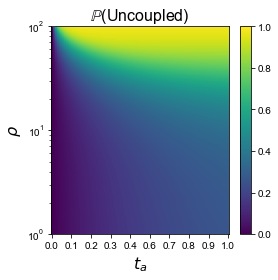

In [4]:
%%time
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define Probability of different states as a function of rho and time
rhos=np.logspace(0, 2., num=100)
t = np.linspace(0, 1., num=100)
nrho = rhos.shape[0]
nt = t.shape[0]

prob1_mat = np.zeros(shape=(nrho, nt))
for i in range(nrho):
    r = rhos[i]
    # Calculation of 
    cur_prob1 = r*(1.  - np.exp(-t*(r/2 + 1)))/(r + 2)
    prob1_mat[i] = cur_prob1

# Plotting Values
f, ax = plt.subplots(1,1,figsize=(4,4), sharey=True)
im1 = ax.imshow(prob1_mat, vmin=0, vmax=1.0, aspect='auto')
ax.set(yscale="log")
ax.set_ylim(np.min(rhos), np.max(rhos))
cbar = f.colorbar(im1, ax=ax)
# Tick Labels
idx = np.linspace(0, nt-1, 10, dtype=np.int32)
ax.set_xticks(idx);
ax.set_xticks(idx);
ax.set_xticklabels(np.round(t[idx],decimals=1), {'fontsize': 10})
ax.set_xticklabels(np.round(t[idx],decimals=1),{'fontsize': 10})

ax.set_ylabel(r'$\rho$', fontsize=16)
# ax.set_xlabel(r'$t_a$', fontsize=16)
ax.set_xlabel(r'$t_a$', fontsize=16)
ax.set_title(r'$\mathbb{P}$(Uncoupled)', fontsize=16)
f.tight_layout()

plt.savefig(main_figdir + 'fig_2A.pdf', dpi=300, bbox_inches='tight')

## Correlation in Branch Length

In [5]:
def se_cov(x,y, unbiased=False):
    """ compute the standard error of a covariance (using Richardsons formula) """
    assert(x.shape[0] == y.shape[0])
    n = x.shape[0]
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    mean_diff_x = (x - mu_x)
    mean_diff_y = (y - mu_y)
    mu_22 = np.mean((mean_diff_x**2) * (mean_diff_y**2))
    mu_11 = np.mean(mean_diff_x * mean_diff_y)
    mu_20 = np.var(x)
    mu_02 = np.var(y)
    var_cov_xy = (n-1)**2/(n**3)*(mu_22 - mu_11**2) + (n-1)/(n**3)*(mu_02 * mu_20 - mu_11**2)
    if unbiased:
        var_cov_xy  = var_cov_xy * ((n/(n-1))**2)
    return(var_cov_xy)

def se_corr(x,y):
    """ Calculate standard error of correlation  """
    assert(x.shape[0] == y.shape[0])
    r = np.corrcoef(x,y)[0,1]
    N = x.shape[0]
    se_r = np.sqrt((1. - r**2)/(N-2))
    return(se_r)

CPU times: user 1.74 s, sys: 101 ms, total: 1.84 s
Wall time: 1.86 s


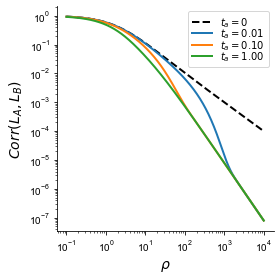

In [6]:
%%time
rhos2_t = 10**np.linspace(-1,4, 1000)
u002 = lambda rho : (rho**2 + 14*rho + 36) / (rho**2 + 13*rho + 18)

f, ax = plt.subplots(1,1, figsize=(4,4))
ta = 0.01
Ne = 1e4
ax.loglog(rhos2_t, TwoLocusTheoryConstant._corrLALB(rhos2_t, 0.0), linestyle='--', 
        lw=2, color='black', label=r'$t_a = 0$')
ax.loglog(rhos2_t, TwoLocusTheoryConstant._corrLALB(rhos2_t, ta), 
          lw=2, label=r'$t_a = %0.2f$' % ta)
ax.loglog(rhos2_t, TwoLocusTheoryConstant._corrLALB(rhos2_t, ta*10), 
          lw=2, label=r'$t_a = %0.2f$' % (ta*10))
ax.loglog(rhos2_t, TwoLocusTheoryConstant._corrLALB(rhos2_t, ta*100), 
        lw=2, label=r'$t_a = %0.2f$' % (ta*100))

ax.set_xlabel(r'$\rho$', fontsize=14)
ax.set_ylabel(r'$Corr(L_A, L_B)$', fontsize=14)
ax.legend(fontsize=10, labelspacing=-0.25)
debox(ax);

plt.savefig(supp_figdir + 'fig_S2B.pdf', dpi=300, bbox_inches='tight')

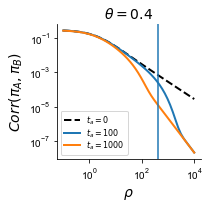

In [7]:
theta = 0.4

# Plot the 
rhos2_t = 10**np.linspace(-1,4, 50)
u002 = lambda rho : (rho**2 + 14*rho + 36) / (rho**2 + 13*rho + 18)

f, ax = plt.subplots(1,1, figsize=(3,3))
ta = 100
Ne = 1e4
ax.plot(rhos2_t, TwoLocusTheoryConstant._corrSASB(rhos2_t, 0., theta=theta), 
          linestyle='--', lw=2, color='black', label=r'$t_a = 0$')
ax.plot(rhos2_t, TwoLocusTheoryConstant._corrSASB(rhos2_t, ta/Ne/2., theta=theta), 
        lw=2, label=r'$t_a = %d$' % ta)
ax.plot(rhos2_t, TwoLocusTheoryConstant._corrSASB(rhos2_t, ta*10/Ne/2., theta=theta), 
        lw=2, label=r'$t_a = %d$' % (ta*1e1))
# ax.plot(rhos2_t, TwoLocusTheoryConstant._corrSASB(rhos2_t, ta*1e2/Ne/2., theta=theta), 
#         lw=2, label=r'$t_a = %d$' % (ta*1e2))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'$\theta = %0.1f$' % theta, fontsize=14)
ax.set_xlabel(r'$\rho$', fontsize=14)
ax.set_ylabel(r'$Corr(\pi_A, \pi_B)$', fontsize=14)
ax.legend(fontsize=8, labelspacing=-0.0)
debox(ax);
ax.axvline(400)
# plt.savefig(main_figdir + 'fig_2B.pdf', dpi=300, bbox_inches='tight')

100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


CPU times: user 1min 5s, sys: 85.2 ms, total: 1min 5s
Wall time: 1min 6s


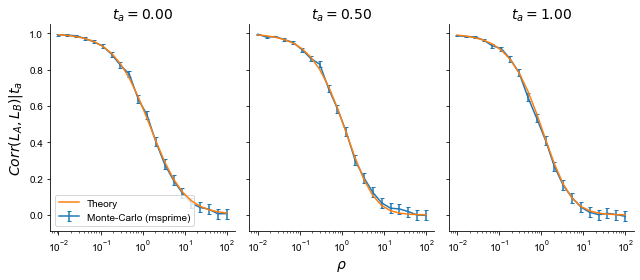

In [8]:
%%time
# Checking the covariance/correlation in total branch length between
# (1) theory
# (2) SC -model
# (3) msprime simulations 

tas = [0.0, 0.5, 1.0]
ntas = len(tas)
n=20
nreps = 5000
Ne = 1

rhos_test = np.logspace(-2,2,n)

fig ,axs = plt.subplots(1,ntas,figsize=(3*ntas,4), sharey=True, sharex=True)
for j in range(ntas):
    corrLALB_msprime = np.zeros(n)
    se_corrLALB_msprime = np.zeros(n)
    ta = tas[j]
    for i in tqdm(range(n)):
        rho = rhos_test[i]
        # Rho in this setting is always 4Nr
        rec_rate = rho / (4 * Ne) / 2
        two_locus_simp = TwoLocusSerialCoalescent(Ne=Ne, ta=ta*2*Ne, rec_rate=rec_rate, reps=nreps)
        two_locus_simp._simulate()
        two_locus_simp._two_locus_branch_length()
        # We should have to subtract the ta value?
        corrLALB_msprime[i] = np.corrcoef(two_locus_simp.pair_branch_length[:,0], two_locus_simp.pair_branch_length[:,1])[0,1]
        se_corrLALB_msprime[i] = se_corr(two_locus_simp.pair_branch_length[:,0], two_locus_simp.pair_branch_length[:,1])
    axs[j].errorbar(rhos_test, corrLALB_msprime, yerr=1.96*se_corrLALB_msprime, capsize=2,label=r'Monte-Carlo (msprime)')
    axs[j].plot(rhos_test, TwoLocusTheoryConstant._corrLALB(rhos_test, ta), zorder=10, label=r'Theory')
    axs[j].set_title(r'$t_a = %0.2f$' % ta, fontsize=14)
    debox(axs[j]);

# Setting appropriate rescalings
axs[0].set_xscale('log')
axs[0].set_ylabel(r'$Corr(L_A,L_B) | t_a$', fontsize=14)
axs[1].set_xlabel(r'$\rho$', fontsize=14);
axs[0].legend(fontsize=10)
plt.savefig(supp_figdir + 'fig_S3.pdf', dpi=300, bbox_inches='tight')